# Forecasting Problem 1

#### Task:

Forecast the Airline prices. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for Forecasting.


## Steps:

1. Import new data set
    - understand the dataset, look into it.
    - perform EDA.
    - check data info and null values.
    - Explore and Visualize the series
2. Partition & Metrics
    - Partition series
    - Define Metrics and Predictive accuracy evaluators
3. Apply forecasting methods
    - Model-driven
        - Classical Model Based
        - Py-caret based ML models
    - Data-driven
        - Moving averages & EWMA
        - Smoothing Techniques
        - Auto Regression Models
4. Evaluate and Compare Performance
    - Compare RSME values of all models
5. Implement Forecasting model
6. Conclusion

## Import new dataset

In [1]:
#load the Basic libraries
import pandas as pd
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#Load visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.graphics.tsaplots as tsa_plots
from matplotlib.patches import Rectangle
%matplotlib inline

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [ ]:
# Load Time series Libraries
#import itertools
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
raw_data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
raw_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
raw_data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [6]:
data = raw_data.copy()

In [7]:
data.info() #No Null values
#Note data type of data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


##### Visualizing the data

In [9]:
viz=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col=0)
viz[:6]

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995


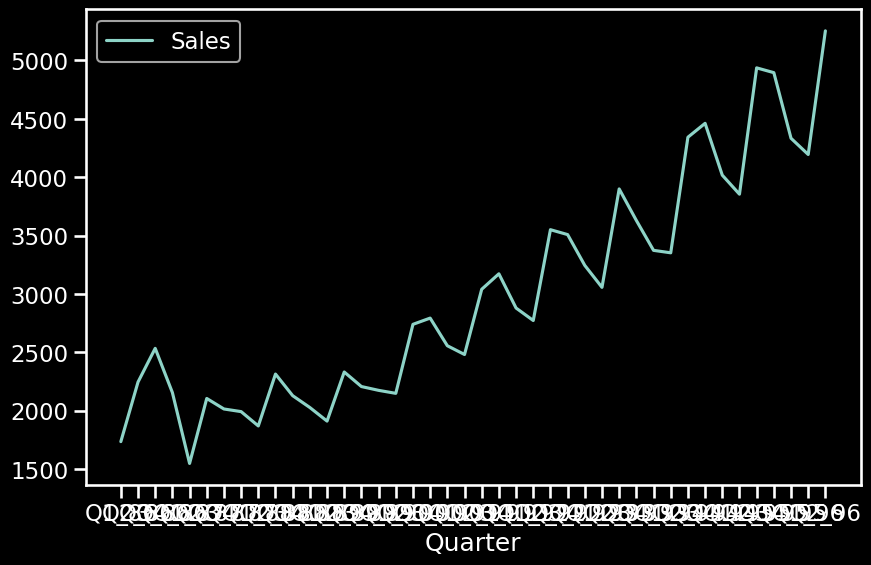

In [10]:
#Line plot
sns.set(rc={'figure.figsize':(10,6.18)})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.lineplot(data=viz, color='lime')
plt.show()
#There seems to be a upward trend with additive seasonality

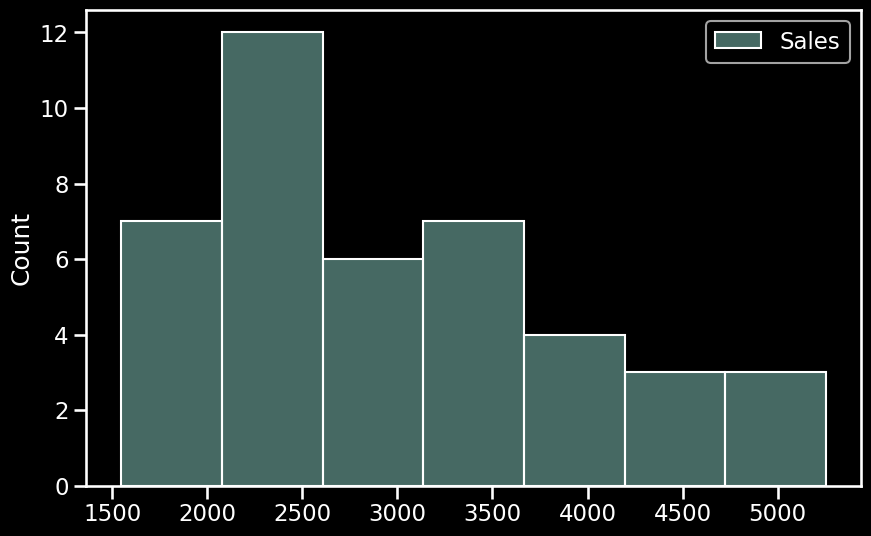

In [11]:
sns.histplot(data=viz, color='mediumorchid')
plt.show() #Passenger count with reference to months

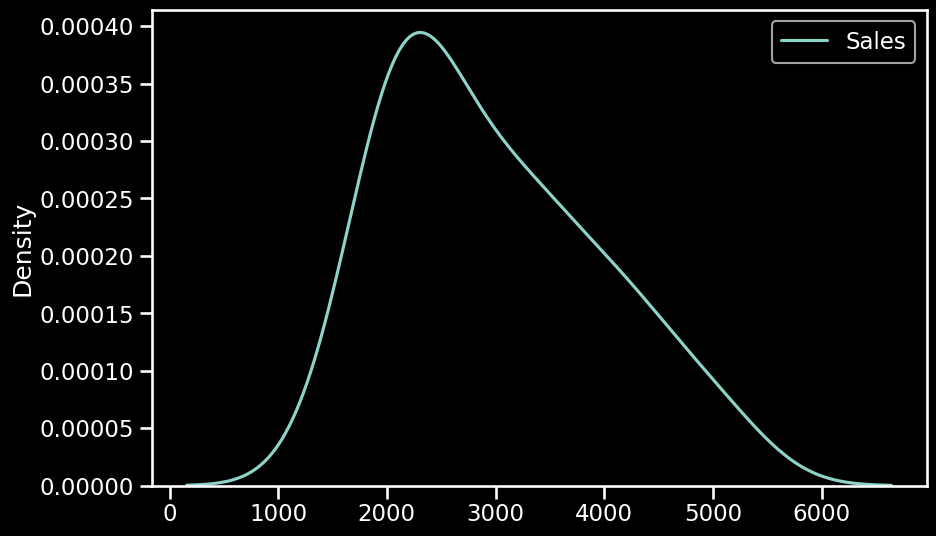

In [12]:
sns.kdeplot(data=viz, color='fuchsia')
plt.show() #Density Plot

In [13]:
data['quarters'] = data.Quarter.apply(lambda x : x.split('_')[0])
data['years'] = data.Quarter.apply(lambda x : x.split('_')[1])
data.head()

,Quarter,Sales,quarters,years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [14]:
quater_dumies=pd.DataFrame(pd.get_dummies(data.quarters))
data=pd.concat([data,quater_dumies],axis=1)
data.head()

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,True,False,False,False
1,Q2_86,2244.960999,Q2,86,False,True,False,False
2,Q3_86,2533.804993,Q3,86,False,False,True,False
3,Q4_86,2154.962997,Q4,86,False,False,False,True
4,Q1_87,1547.818996,Q1,87,True,False,False,False


Text(0.5, 1.0, 'Heatmap of Sales Count with Year and Quarters')

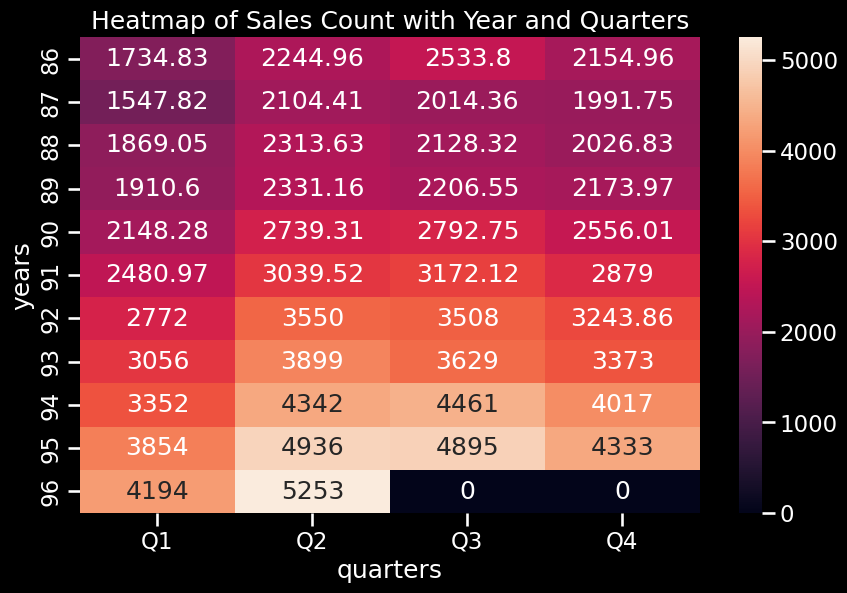

In [15]:
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="years",columns="quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.title('Heatmap of Sales Count with Year and Quarters')

<Axes: xlabel='quarters', ylabel='Sales'>

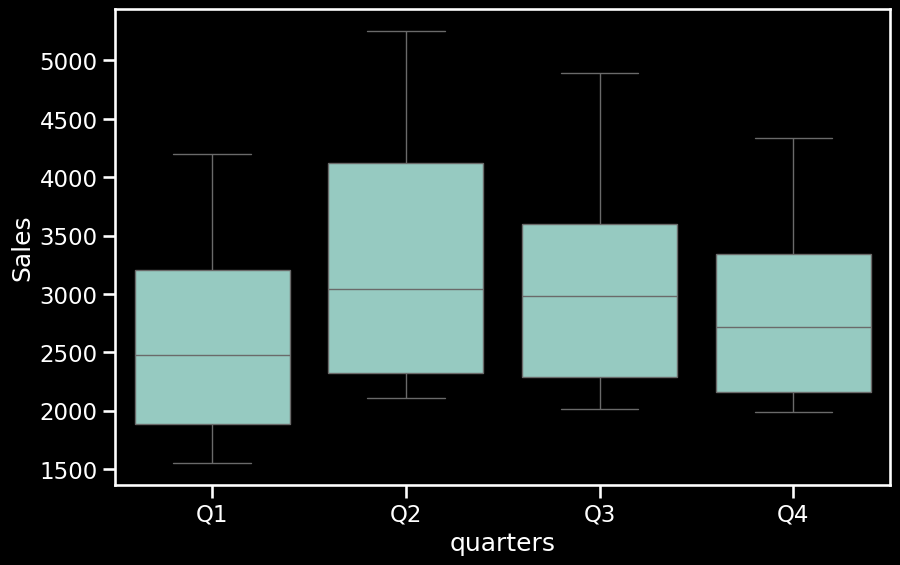

In [16]:
sns.boxplot(x='quarters',y='Sales',data=data)

<Axes: xlabel='years', ylabel='Sales'>

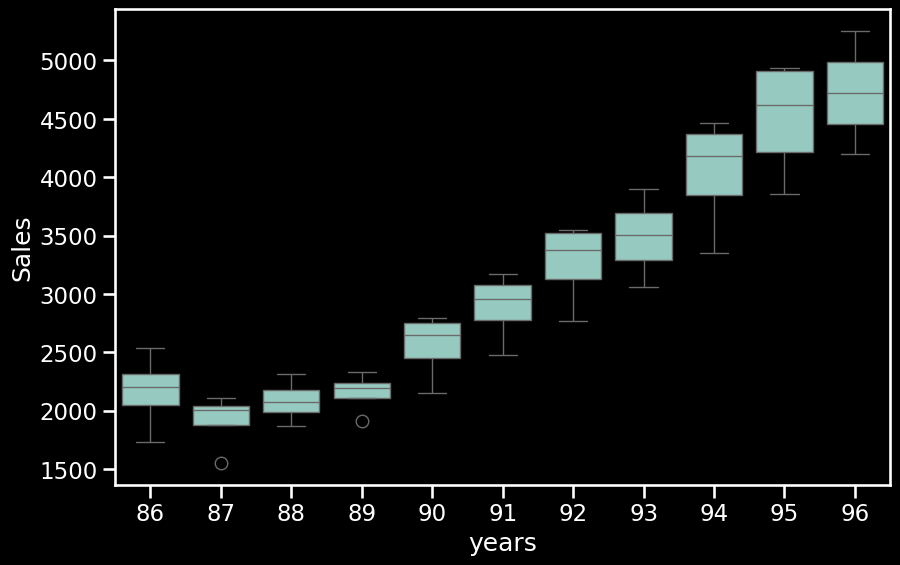

In [17]:
sns.boxplot(x='years',y='Sales',data=data)

##### Seasonal Decompose plots

In [18]:
decompose_ts = seasonal_decompose(viz,period=12)

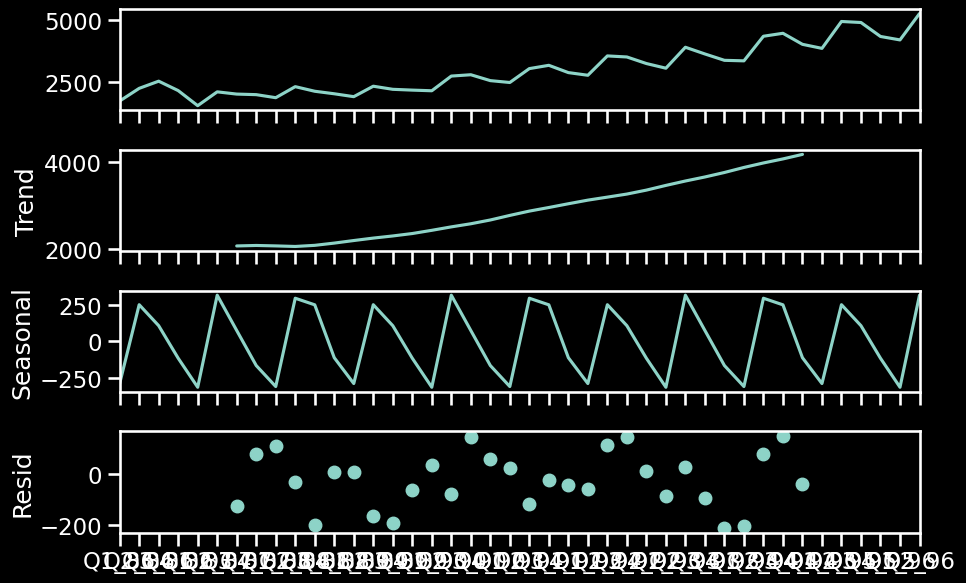

In [19]:
decompose_ts.plot()
plt.show() # there seems to be some patern in the residue

##### ACF and PACF plots

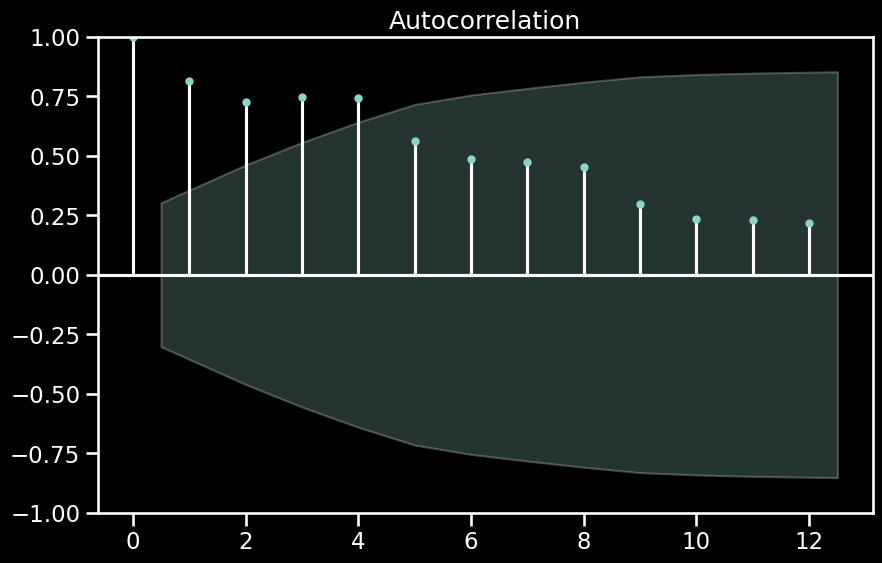

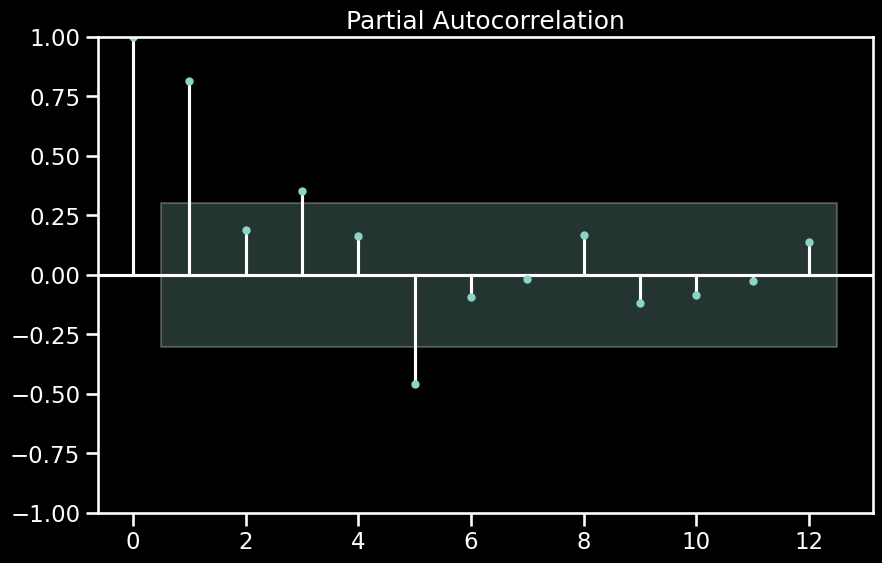

In [20]:
tsa_plots.plot_acf(viz,lags=12)
#Autocorrelation Factor >> uptill 6 we have good corr() above +-2 SE [Standard Error]
tsa_plots.plot_pacf(viz,lags=12)
#Partial Autocorrelation Factor >> only 9 and 11 show some good corr() +-2 SE [Standard Error]
plt.show()

## Preprocess data

#### Transformations

In [21]:
# adding t values >> new variable 1
data['t']= np.arange(1,data.shape[0]+1)

In [22]:
# adding t_sqr values >> new variable 2
data['t_sqr'] = data['t']**2

In [23]:
# adding log_ values >> new variable 3
data['log_sales'] = np.log(data['Sales'])

In [24]:
data.head()

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602


#### Partition & Metrics

In [25]:
#Partition Series
train = data.iloc[:35]
test = data.iloc[35:]

##### RMSE for Predictive Accuracy
- Model with lowest RMSE is the best

In [26]:
#performance metrics
pfm_model_bsd = dict() # For model driven
pfm_data_bsd = dict() # For Data driven

## Applying Forecasting Methods
### Model Driven

#### Classical ML Model based Methods

In [27]:
#Linear Model
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = mean_squared_error(test.Sales, pred_linear, squared=False) #RMSE Calculation
pfm_model_bsd.update( {'Linear Model' : rmse_linear} )
rmse_linear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


636.5072930351143

In [28]:
#Exponential
Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = mean_squared_error(test.Sales, pred_Exp, squared=False)
pfm_model_bsd.update( {'Exponential Model' : rmse_Exp} )
rmse_Exp

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4515.811064811282

In [29]:
#Quadratic
Quad = smf.ols('Sales~t+t_sqr',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sqr"]]))
rmse_Quad = mean_squared_error(test.Sales,pred_Quad, squared=False)
pfm_model_bsd.update( {'Quadratic Model' : rmse_Quad} )
rmse_Quad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


511.811731941759

In [30]:
#Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = mean_squared_error(test.Sales,pred_add_sea, squared=False)
pfm_model_bsd.update( {'Additive seasonality' : rmse_add_sea} )
rmse_add_sea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1861.8704164251737

In [31]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_sqr']]))
rmse_add_sea_quad = mean_squared_error(test.Sales,pred_add_sea_quad, squared=False)
pfm_model_bsd.update( {'Additive Seasonality Quadratic' : rmse_add_sea_quad} )
rmse_add_sea_quad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


309.46413951632803

In [32]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = mean_squared_error(test.Sales,pred_Mult_sea, squared=False)
pfm_model_bsd.update( {'Multiplicative Seasonality' : rmse_Mult_sea} )
rmse_Mult_sea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4516.300741074347

In [33]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = mean_squared_error(test.Sales,pred_Mult_add_sea, squared=False)
pfm_model_bsd.update( {'Multiplicative Additive Seasonality ' : rmse_Mult_add_sea} )
rmse_Mult_add_sea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4515.822756171213

In [34]:
result_model_bsd = pd.DataFrame(pfm_model_bsd.items(),columns=['MODEL', 'RMSE'])
result_model_bsd.sort_values(by=['RMSE'])
#Additive Seasonality Quadratic has the best values
# We will plot the forcasting in the evaluation part

,MODEL,RMSE
4,Additive Seasonality Quadratic,309.464140
2,Quadratic Model,511.811732
0,Linear Model,636.507293
3,Additive seasonality,1861.870416
1,Exponential Model,4515.811065
6,Multiplicative Additive Seasonality,4515.822756
5,Multiplicative Seasonality,4516.300741


###### Model Evaluation - Additive Seasonality Quadratic

In [35]:
data2 = data.copy()
data2.head()

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602


In [36]:
data2.columns.values

array(['Quarter', 'Sales', 'quarters', 'years', 'Q1', 'Q2', 'Q3', 'Q4',
       't', 't_sqr', 'log_sales'], dtype=object)

In [37]:
data2.drop(['Quarter','Q1', 'Q2', 'Q3', 'Q4','t_sqr', 'log_sales'], axis=1, inplace=True)
data2 = data2[['t', 'years', 'quarters', 'Sales']]
data1 = data2.copy()
data3 = data2.copy()
data_fnl = data2.copy()
data2.head()

,t,years,quarters,Sales
0,1,86,Q1,1734.827000
1,2,86,Q2,2244.960999
2,3,86,Q3,2533.804993
3,4,86,Q4,2154.962997
4,5,87,Q1,1547.818996


In [38]:
data2["Predicted"] = pd.Series(add_sea_Quad.predict(data[['Q1','Q2','Q3','Q4','t','t_sqr']]))
data2.head()

,t,years,quarters,Sales,Predicted
0,1,86,Q1,1734.827000,1715.011163
1,2,86,Q2,2244.960999,2277.750192
2,3,86,Q3,2533.804993,2194.873446
3,4,86,Q4,2154.962997,1919.651866
4,5,87,Q1,1547.818996,1703.261332


In [39]:
# add a date column in the dataset
data2['Date'] = pd.date_range(start='1986-01-01', end = '1996-07-01', freq = 'Q')
data2.head()

,t,years,quarters,Sales,Predicted,Date
0,1,86,Q1,1734.827000,1715.011163,1986-03-31
1,2,86,Q2,2244.960999,2277.750192,1986-06-30
2,3,86,Q3,2533.804993,2194.873446,1986-09-30
3,4,86,Q4,2154.962997,1919.651866,1986-12-31
4,5,87,Q1,1547.818996,1703.261332,1987-03-31


<Axes: xlabel='Date', ylabel='Value'>

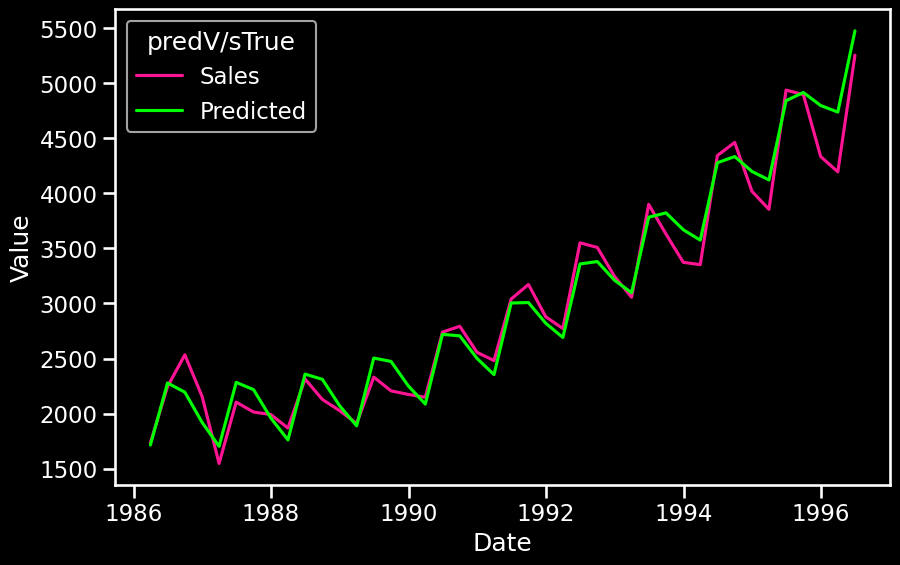

In [40]:
# line plot - View for the entire dataset _ ASQ
viz2 = data2.loc[:,["Date","Sales","Predicted"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz2, x=viz2.Date, y=viz2.Value,hue="predV/sTrue",palette=["deeppink","lime"])
#There is certain variance in the initial years and final years

<ipython-input-41-44f20488ae7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Predicted.iloc[:35] = np.nan


<Axes: xlabel='Date', ylabel='Value'>

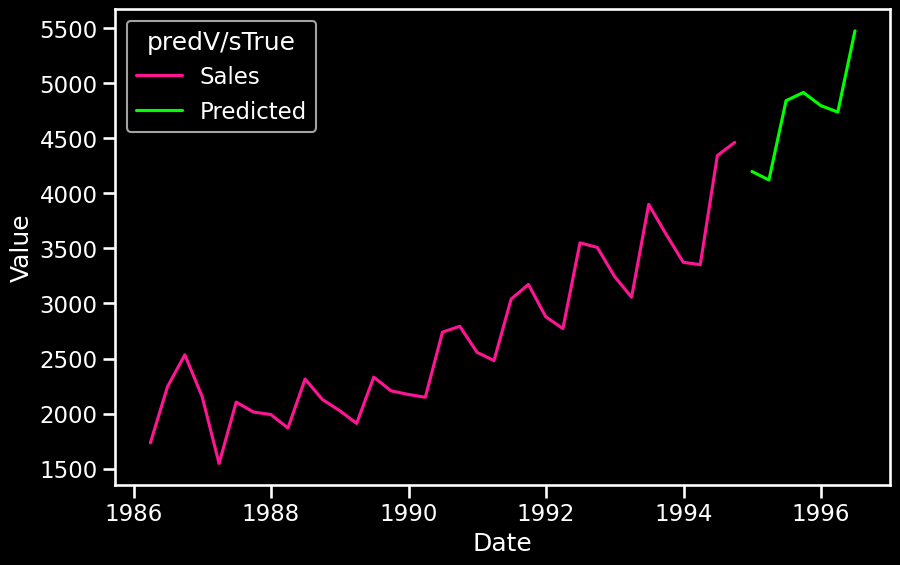

In [41]:
#Line plot - Train V/s Test Plot
data2.Predicted.iloc[:35] = np.nan
data2.Sales.iloc[35:] = np.nan

viz3 = data2.loc[:,["Date","Sales","Predicted"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz3, x=viz3.Date, y=viz3.Value,hue="predV/sTrue",palette=["deeppink","lime"])
#There is large variance from true value

#### Pycaret ML Model based Methods
- This is a low code library which is extremely good and fast
- https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63

In [42]:
#we have copied this data from previous case
data1.head()

,t,years,quarters,Sales
0,1,86,Q1,1734.827000
1,2,86,Q2,2244.960999
2,3,86,Q3,2533.804993
3,4,86,Q4,2154.962997
4,5,87,Q1,1547.818996


In [43]:
#Partition Series
train1 = data1.iloc[:35]
test1 = data1.iloc[35:]

In [44]:
#!pip install pycaret

In [46]:
# Import the PyCaret library and regression module
from pycaret.regression import setup

# Initialize setup
s = setup(data=train1,
          test_data=test1,
          target='Sales',
          fold_strategy='timeseries',
          numeric_features=['years', 't'],
          fold=3,
          transform_target=True,
          data_split_shuffle=False,  # Set data_split_shuffle to False
          fold_shuffle=False,        # Set fold_shuffle to False
          session_id=123)


,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(42, 4)"
4,Transformed data shape,"(42, 15)"
5,Transformed train set shape,"(35, 15)"
6,Transformed test set shape,"(7, 15)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [48]:
# Import the compare_models function from the PyCaret library
from pycaret.regression import compare_models

best = compare_models(sort = 'RMSE') #Super fast Library
#Best Values for Huber Regression RMSE = 350.2645

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,272.1685,114513.2341,319.8002,0.1353,0.1129,0.0906,2.0233
ridge,Ridge Regression,274.0768,123315.9025,332.4015,0.0694,0.1145,0.0895,0.1000
br,Bayesian Ridge,296.0097,139682.1173,358.6318,-0.1381,0.1282,0.0988,0.1567
lar,Least Angle Regression,348.7513,209751.5956,408.3886,-0.6084,0.1508,0.1179,0.0967
gbr,Gradient Boosting Regressor,304.7748,172132.4113,408.6706,-0.1440,0.1319,0.0940,0.1533
dt,Decision Tree Regressor,327.6432,180214.1066,415.5336,-0.1591,0.1343,0.1013,0.1000
omp,Orthogonal Matching Pursuit,362.7960,209360.0070,447.0302,-0.4806,0.1521,0.1153,0.1433
xgboost,Extreme Gradient Boosting,362.7233,222157.7318,462.0580,-0.4377,0.1531,0.1129,0.1300
rf,Random Forest Regressor,404.1479,274149.8065,506.5261,-0.7692,0.1681,0.1252,0.2600
ada,AdaBoost Regressor,433.6886,296061.5685,517.1766,-0.9981,0.1763,0.1362,0.1700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [50]:
# Import the predict_model function from the PyCaret library
from pycaret.regression import predict_model

prediction_holdout = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,153.4883,34619.1083,186.0621,0.8562,0.0456,0.0350


In [51]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data1)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,79.7168,11394.0532,106.7429,0.9878,0.0358,0.0274


,t,years,quarters,Sales,prediction_label
0,1,86,Q1,1734.827026,1849.220178
1,2,86,Q2,2244.960938,2311.297775
2,3,86,Q3,2533.804932,2296.219353
3,4,86,Q4,2154.962891,2146.982175
4,5,87,Q1,1547.818970,1650.415687


In [52]:
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='1986-01-01', end = '1996-07-01', freq = 'Q')
data_ma = predictions.copy()
data4 =  predictions.copy()
predictions.head()

,t,years,quarters,Sales,prediction_label,Date
0,1,86,Q1,1734.827026,1849.220178,1986-03-31
1,2,86,Q2,2244.960938,2311.297775,1986-06-30
2,3,86,Q3,2533.804932,2296.219353,1986-09-30
3,4,86,Q4,2154.962891,2146.982175,1986-12-31
4,5,87,Q1,1547.818970,1650.415687,1987-03-31


<Axes: xlabel='Date', ylabel='Value'>

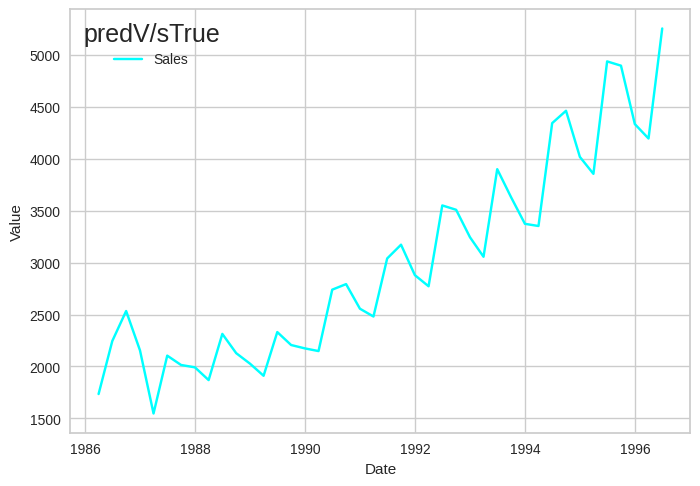

In [59]:
# line plot - View for the entire dataset
viz1 = predictions.loc[:, ["Date", "Sales"]].melt("Date", var_name="predV/sTrue", value_name="Value")
sns.lineplot(data=viz1, x="Date", y="Value", hue="predV/sTrue", palette=["aqua", "red"])
# Lesser Variance as compared to the previous case


<Axes: xlabel='Date', ylabel='Value'>

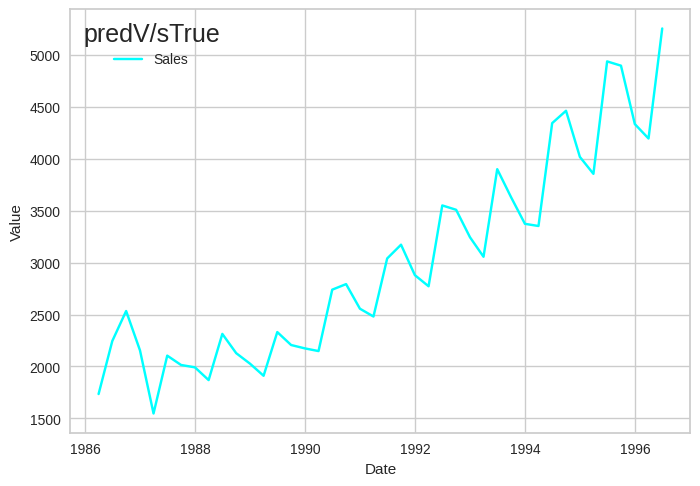

In [60]:
# line plot - View for the entire dataset

viz1 = predictions.loc[:,["Date","Sales"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz1, x=viz1.Date, y=viz1.Value,hue="predV/sTrue",palette=["aqua","red"])
#Lesser Variance as compared to previous case

<Axes: xlabel='Date', ylabel='Value'>

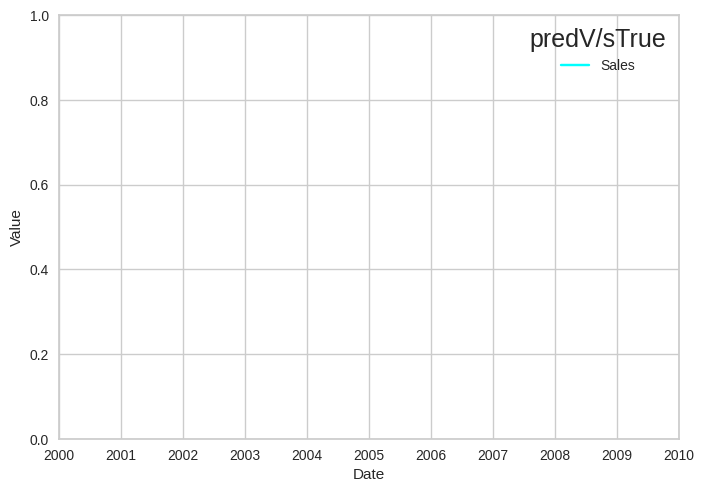

In [63]:
# line plot - View for Train vs test

predictions.iloc[:35, predictions.columns.get_loc('Sales')] = np.nan
predictions.iloc[35:, predictions.columns.get_loc('Sales')] = np.nan

viz4 = predictions.loc[:,["Date","Sales"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz4, x="Date", y="Value", hue="predV/sTrue", palette=["aqua", "red"])
# Lesser Variance compared to previous cases


In [64]:
# line plot - View for Train vs test

predictions.Label.iloc[:35] = np.nan
predictions.Sales.iloc[35:] = np.nan

viz4 = predictions.loc[:,["Date","Sales","Label"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz4, x=viz4.Date, y=viz4.Value,hue="predV/sTrue",palette=["aqua","red"])
#Lesser Variance compared to previous cases

AttributeError: 'DataFrame' object has no attribute 'Label'

### Data Driven Forecasting Techniques

#### Moving Averages

In [65]:
#Make seperate dataset

data_ma = data_ma.set_index('Date')

#Simple Moving Average SMA
data_ma['3-month-SMA'] = data_ma['Sales'].rolling(window=3).mean()
data_ma['6-month-SMA'] = data_ma['Sales'].rolling(window=6).mean()
data_ma['12-month-SMA'] = data_ma['Sales'].rolling(window=12).mean()

<Axes: xlabel='Date'>

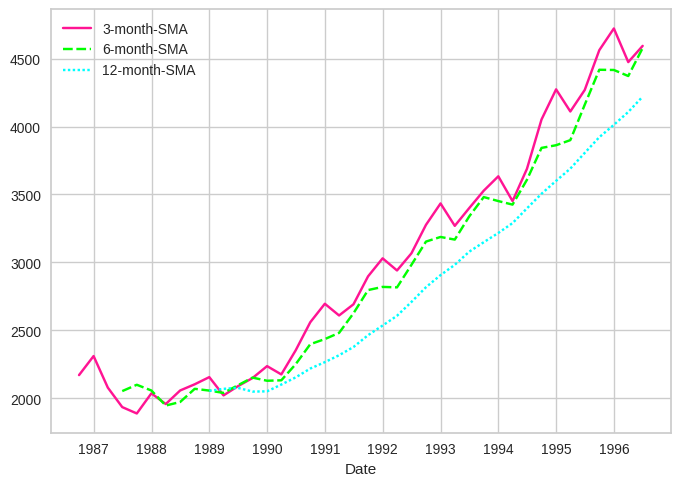

In [66]:
sns.lineplot(data=data_ma[['3-month-SMA','6-month-SMA','12-month-SMA']],palette=["deeppink","lime","aqua"]) #SMA Plot

In [67]:
#for 3-Months only since it will have the lowest SMA
data_ma['3-month-SMA']=data_ma['3-month-SMA'].fillna(0)
rmse_SMA_3Months = mean_squared_error(data_ma.Sales,data_ma['3-month-SMA'], squared=False)
pfm_data_bsd.update({'SMA-3Months':rmse_SMA_3Months})
rmse_SMA_3Months

530.9743107228161

<Axes: xlabel='Date'>

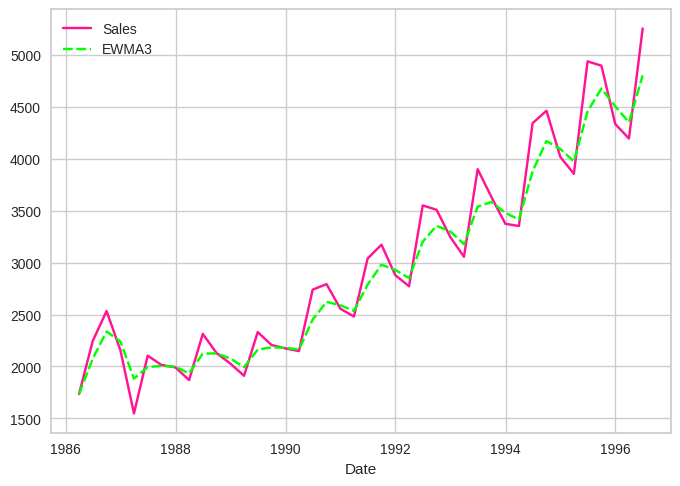

In [68]:
#Exponentially Weighted Moving Average EWMA
data_ma['EWMA3'] = data_ma['Sales'].ewm(span=3,adjust=True).mean() #3month Span

#Line Plot EWMA
sns.lineplot(data=data_ma[["Sales","EWMA3"]],palette=["deeppink","lime"]) #SMA Plot

In [69]:
#for 3-Months only since it will have the lowest EWMA
data_ma['EWMA3'] =data_ma['EWMA3'] .fillna(0)
rmse_EWMA3 = mean_squared_error(data_ma.Sales,data_ma['EWMA3'] , squared=False)
pfm_data_bsd.update({'EWMA 3Months':rmse_EWMA3})
rmse_EWMA3 #This is a low value but it alone cannot be taken

199.4860405567558

#### Smoothing Techniques

In [70]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_SES = mean_squared_error(test.Sales,pred_ses, squared=False)
pfm_data_bsd.update({'SES':rmse_SES})
rmse_SES

923.0344381080416

In [71]:
# Holt method
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse_Holt = mean_squared_error(test.Sales,pred_hw, squared=False)
pfm_data_bsd.update({'Holt':rmse_Holt})
rmse_Holt

797.1595562936291

In [72]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add = mean_squared_error(test.Sales,pred_hwe_add_add, squared=False)
pfm_data_bsd.update({'HWE Add. Seas & Add. Trend':rmse_hwe_add})
rmse_hwe_add

261.43577391391307

In [73]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_mul = mean_squared_error(test.Sales,pred_hwe_mul_add, squared=False)
pfm_data_bsd.update({'HWE Mul. Seas & Add. Trend':rmse_hwe_mul})
rmse_hwe_mul #Very good value

271.5135394681778

In [74]:
pfm_data_bsd

{'SMA-3Months': 530.9743107228161,
 'EWMA 3Months': 199.4860405567558,
 'SES': 923.0344381080416,
 'Holt': 797.1595562936291,
 'HWE Add. Seas & Add. Trend': 261.43577391391307,
 'HWE Mul. Seas & Add. Trend': 271.5135394681778}

In [75]:
result_data_bsd = pd.DataFrame(pfm_data_bsd.items(),columns=['MODEL', 'RMSE'])
result_data_bsd.sort_values(by=['RMSE'])
#Lowest RSME values are for HWE Multiplicative Seasonality and Additive Trend

,MODEL,RMSE
1,EWMA 3Months,199.486041
4,HWE Add. Seas & Add. Trend,261.435774
5,HWE Mul. Seas & Add. Trend,271.513539
0,SMA-3Months,530.974311
3,Holt,797.159556
2,SES,923.034438


###### Model Evaluation - HWE Multiplicative Seasonality and Additive Trend

In [76]:
hwe_mul_model = hwe_model_mul_add.predict(start = data.index[0],end = data.index[-1])
data3['predicted'] = hwe_mul_model
data3.head()

,t,years,quarters,Sales,predicted
0,1,86,Q1,1734.827000,1899.830596
1,2,86,Q2,2244.960999,2172.260312
2,3,86,Q3,2533.804993,2281.109320
3,4,86,Q4,2154.962997,2286.933848
4,5,87,Q1,1547.818996,1923.161962


In [77]:
# add a date column in the dataset
data3['Date'] = pd.date_range(start='1986-01-01', end = '1996-07-01', freq = 'Q')
data3.head()

,t,years,quarters,Sales,predicted,Date
0,1,86,Q1,1734.827000,1899.830596,1986-03-31
1,2,86,Q2,2244.960999,2172.260312,1986-06-30
2,3,86,Q3,2533.804993,2281.109320,1986-09-30
3,4,86,Q4,2154.962997,2286.933848,1986-12-31
4,5,87,Q1,1547.818996,1923.161962,1987-03-31


<Axes: xlabel='Date', ylabel='Value'>

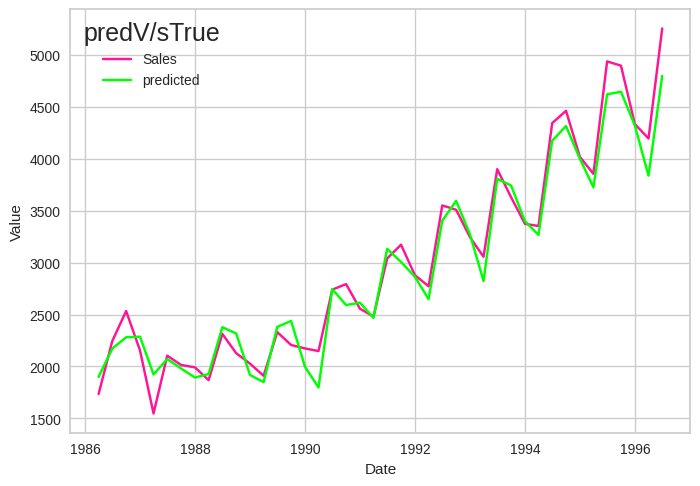

In [78]:
# line plot - View for the entire dataset _ ASQ
viz5 = data3.loc[:,["Date","Sales","predicted"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz5, x=viz5.Date, y=viz5.Value,hue="predV/sTrue",palette=["deeppink","lime"])
#THe model has the best RMSE value

<Axes: xlabel='Date', ylabel='Value'>

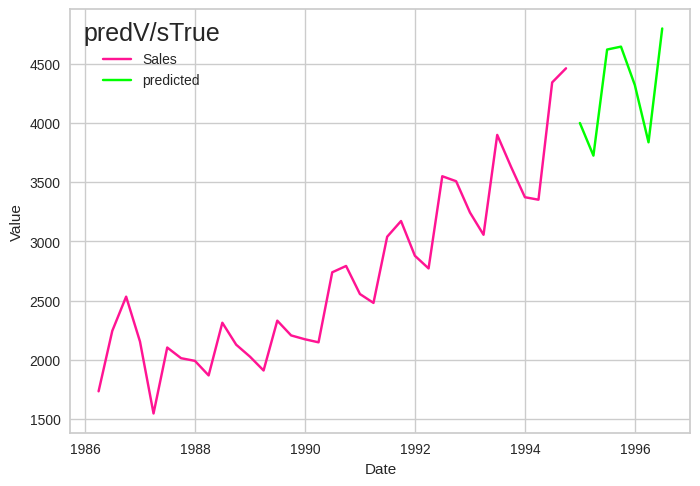

In [79]:
#Line plot - Train V/s Test Plot
data3.predicted.iloc[:35] = np.nan
data3.Sales.iloc[35:] = np.nan

viz6 = data3.loc[:,["Date","Sales","predicted"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz6, x=viz6.Date, y=viz6.Value,hue="predV/sTrue",palette=["deeppink","lime"])

#### Auto Regression Models
- Our data has both trend and Seasonality.
- Very less chance for it to be stationary data.
- We will perform AD-Fuller test to determine stationarity.
- We will observe the ACF and PACF plots to determine suitable Lags.
- After that, we will perform LL test on each model to determine best values
##### AD-Fuller stationarity test

In [80]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [81]:
data4=data4.set_index('Date')
data4.head()

,t,years,quarters,Sales,prediction_label
Date,,,,,
1986-03-31,1,86,Q1,1734.827026,1849.220178
1986-06-30,2,86,Q2,2244.960938,2311.297775
1986-09-30,3,86,Q3,2533.804932,2296.219353
1986-12-31,4,86,Q4,2154.962891,2146.982175
1987-03-31,5,87,Q1,1547.818970,1650.415687


In [82]:
#AD- Fuller test
adf_test(data4[['Sales']]) #As expected, data is non stationary
#We might need to use SARIMA test in this case

Fail to reject the null hypothesis
Data is non-stationary


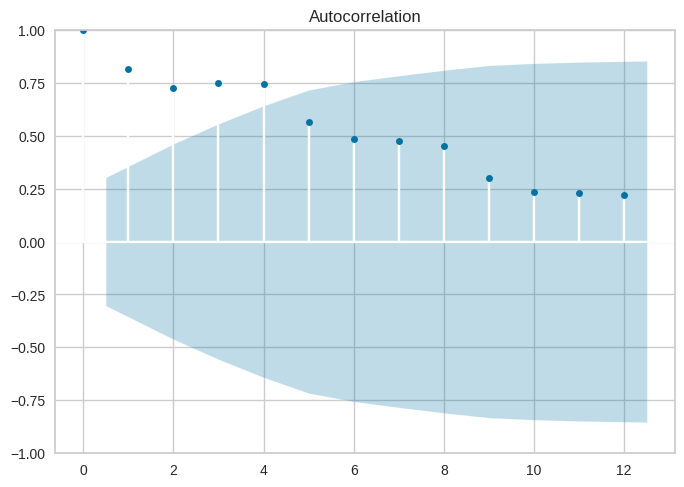

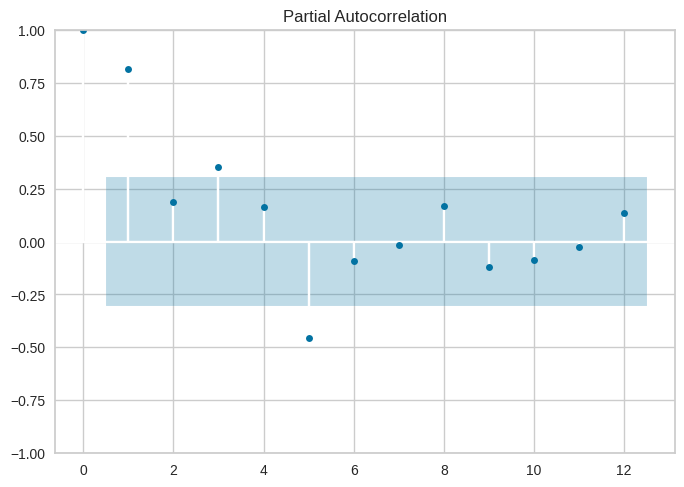

In [83]:
#ACF and PACF Plots
tsa_plots.plot_acf(viz,lags=12)
#Autocorrelation Factor >> uptill 6 we have good corr() above +-2 SE [Standard Error]
tsa_plots.plot_pacf(viz,lags=12)
#Partial Autocorrelation Factor >> only 9 and 11 show some good corr() +-2 SE [Standard Error]
plt.show()

In [84]:
# We will run a auto arima to determine the ARIME orders
from pmdarima import auto_arima # for determining ARIMA orders

In [85]:
stepwise_fit = auto_arima(data4.Sales, start_p=0, start_q=0,
                          max_p=12, max_q=12, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=617.615, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.036, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.723, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=617.215, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=608.949, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=606.079, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=607.920, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=596.966, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=578.516, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=579.745, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=557.379, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=559.112, Time=0.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=563.430, Time=0.47 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -270.690
Date:                Thu, 04 Apr 2024   AIC                            557.379
Time:                        15:24:04   BIC                            571.088
Sample:                    03-31-1986   HQIC                           562.371
                         - 06-30-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    281.4752     70.864      3.972      0.000     142.585     420.366
ar.L1         -1.0106      0.052    -19.467      0.000      -1.112      -0.909
ar.L2         -1.0040      0.059    -16.952      0.000      -1.120      -0.888
ar.L3         -0.9892      0.019    -51.721      0.000      -1.027      -0.952
ma.L1          0.9384      0.211      4.455      0.000       0.525       1.351
ma.L2          0.5186      0.277      1.870      0.061      -0.025       1.062
ma.L3          0.4554      0.170      2.673      0.008       0.122       0.789
sigma2      2.021e+04   5285.238      3.824      0.000    9852.447    3.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.28
Prob(Q):                              0.92   Prob(JB):                         0.03
Heteroskedasticity (H):               0.56   Skew:                            -0.83
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting the ARIMA model
model_arima = ARIMA(train['Sales'], order=(4, 1, 0))
results = model_arima.fit()

# Displaying the summary of the model
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   35
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -228.563
Date:                Thu, 04 Apr 2024   AIC                            467.125
Time:                        15:24:54   BIC                            474.757
Sample:                             0   HQIC                           469.728
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0766      0.089     -0.858      0.391      -0.252       0.098
ar.L2         -0.1251      0.112     -1.115      0.265      -0.345       0.095
ar.L3         -0.0425      0.113     -0.377      0.7

In [86]:
#Fitting a model
from statsmodels.tsa.arima_model import ARIMA

model_arima = ARIMA(train['Sales'],order=(4,1,0))
results = model_arima.fit()
results.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [88]:
pred_arima = results.predict(start=35, end=len(data4)-1, dynamic=False, typ='levels')

In [89]:
#RMSE score of ARIMA
rmse_arima= mean_squared_error(test.Sales,pred_arima, squared=False)
rmse_arima #This value is okay but we will not use it sine we have much better models

187.76196298160215

## Evaluate and Compare Performance
- Best model we have got so far is the Huber Regressor from PyCaret
- We will build our final model based on this one

## Implementing Forecasting Model

In [90]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
final_model = ExponentialSmoothing(data_fnl["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_final = final_model.predict(start = data.index[0],end = data.index[-1])

#Getting RMSE Score
rmse_final = mean_squared_error(data.Sales,pred_final, squared=False)
rmse_final #This score is good

129.75975108785772

In [91]:
data_fnl.head()

,t,years,quarters,Sales
0,1,86,Q1,1734.827000
1,2,86,Q2,2244.960999
2,3,86,Q3,2533.804993
3,4,86,Q4,2154.962997
4,5,87,Q1,1547.818996


In [92]:
data_fnl['final_pred']=pred_final
data_fnl.head()

,t,years,quarters,Sales,final_pred
0,1,86,Q1,1734.827000,1845.217484
1,2,86,Q2,2244.960999,2213.241431
2,3,86,Q3,2533.804993,2230.776854
3,4,86,Q4,2154.962997,2269.675669
4,5,87,Q1,1547.818996,2033.219059


In [93]:
data_fnl['Date'] = pd.date_range(start='1986-01-01', end = '1996-07-01', freq = 'Q')
data_fnl.head()

,t,years,quarters,Sales,final_pred,Date
0,1,86,Q1,1734.827000,1845.217484,1986-03-31
1,2,86,Q2,2244.960999,2213.241431,1986-06-30
2,3,86,Q3,2533.804993,2230.776854,1986-09-30
3,4,86,Q4,2154.962997,2269.675669,1986-12-31
4,5,87,Q1,1547.818996,2033.219059,1987-03-31


<Axes: xlabel='Date', ylabel='Value'>

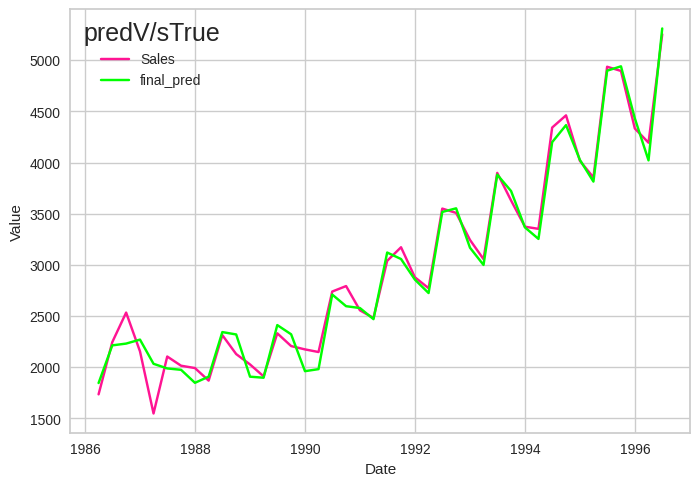

In [94]:
# line plot - View for the entire dataset FInal Model
viz8 = data_fnl.loc[:,["Date","Sales","final_pred"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz8, x=viz8.Date, y=viz8.Value,hue="predV/sTrue",palette=["deeppink","lime"])
#Good model but since we have limited dataset, values are less to improve accuracy

In [95]:
#Forecasting the future
future = pd.DataFrame(final_model.forecast(8)).reset_index()
future.rename(columns={'index':'t',0:'Forecast'},inplace=True)
future.head()

,t,Forecast
0,42,5012.147440
1,43,4645.260903
2,44,4490.053377
3,45,5638.551712
4,46,5671.720685


In [96]:
#Creating Forecast dataset
forecast_df= pd.concat([data_fnl,future], axis=0)
forecast_df.drop('Date',axis=1)
forecast_df['Date']=pd.date_range(start='1986-01-01', end = '1998-09-01', freq = 'Q')
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   t           50 non-null     int64         
 1   years       42 non-null     object        
 2   quarters    42 non-null     object        
 3   Sales       42 non-null     float64       
 4   final_pred  42 non-null     float64       
 5   Date        50 non-null     datetime64[ns]
 6   Forecast    8 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 3.1+ KB


<Axes: xlabel='Date', ylabel='Value'>

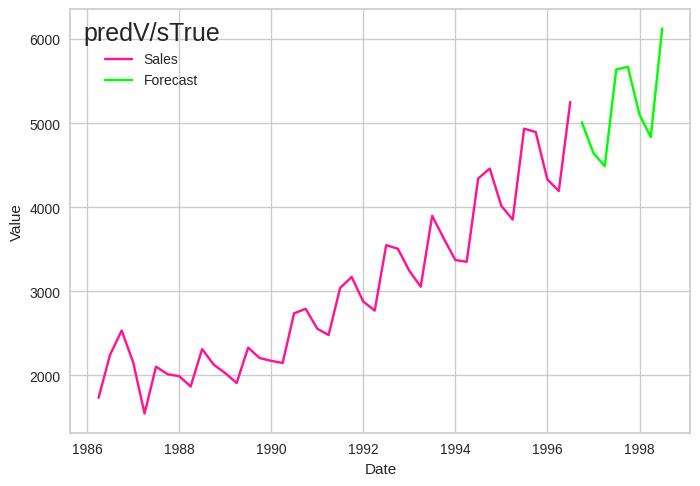

In [97]:
#Future Forecast

viz9 = forecast_df.loc[:,["Date","Sales","Forecast"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz9, x=viz9.Date, y=viz9.Value,hue="predV/sTrue",palette=["deeppink","lime"])
#Best internal forecast so far

## Conclusion
- We have explored all the possible forecasting techniques.
- We have built our final model from HWE Multiplicative Seasonality and Additive Trend
- Forecasting for eight quarters has been plotted.
- If RMSE was not the metric of usage, We could have gone for Gradient Boosting in PyCaret